# FordGoBikes Analysis
## by Maryam Osama

## Investigation Overview

> Formerly known as Ford GoBikes, renamed Lyft Bikes is a regional public bicycle sharing system in the San Francisco Bay Area, California. In this investigation, I've looked at the bike ride trends and biker type of the bay Ford GoBike Share system. The main focus was on biking duration, the time (weekday, hour), and the bike types.


## Dataset Overview

> This overivew explores the Ford GoBike's which is combined with the Baywheels trip data for public containing bike rides in the Bay Area from January 2019 to December 2019.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

D:\Programs\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('baywheels_cleaned.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Ford GoBike System Monthly Usage in 2019

> As per the Ford GoBike System in 2019, July is the most popular month for using the Ford GoBike System with over 250,000 number of bike trips. Followed by March and October.

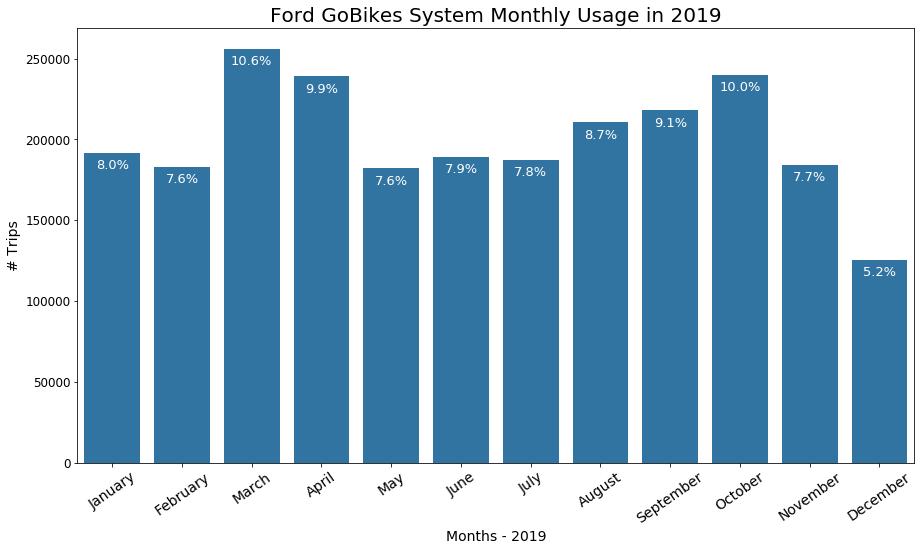

In [4]:
base_color = sb.color_palette()[0]
plt.figure(figsize=(15,8))
sb.countplot(data=df, x='start_month',color=base_color);
plt.ylabel('# Trips',fontsize = 14)
plt.xlabel('Months - 2019',fontsize = 14)
plt.title('Ford GoBikes System Monthly Usage in 2019',fontsize = 20)
month_counts = df['start_month'].value_counts()
total_trips= month_counts.sum()
plt.yticks(size=12); 
locs, labels = plt.xticks(rotation=35, size=14); 
for loc, label in zip(locs, labels):
    count = month_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/total_trips)
    plt.text(loc, count-10000, pct_string, ha = 'center', color = 'white',fontsize = 13)


## Ford GoBike Customers vs. Subscribers in 2019

> In 2019, 80.4% of the user types in the Ford GoBikes sharing platform were Subscribers. 19.6% of the user types in the Ford GoBikes Sharing Platform were Customers.


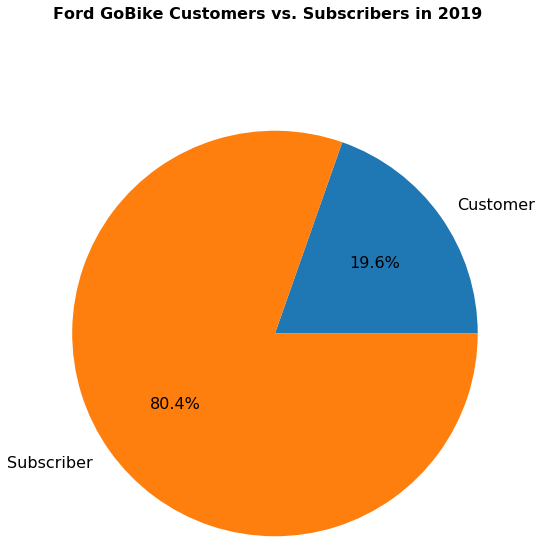

In [10]:
customer = df.query('user_type == "Customer"')['bike_id'].count()
subscriber = df.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df['bike_id'].count()
subscriber_prop = subscriber / df['bike_id'].count()

plt.figure(figsize = [8, 8])
labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
plt.pie(size, labels = labels, autopct='%1.1f%%', textprops={'color':'black','size':16})
plt.axis('equal')
plt.suptitle('Ford GoBike Customers vs. Subscribers in 2019', y=1.07,
             fontsize=16, fontweight='bold');


## Ford GoBikes Customer vs. Subscribers Duration in Minutes

> The Duration in Minutes by User Type plot highlights that Customers normally have longer trip durations. Customers normally ride between 8 minutes and 18 minutes. Subscriber trips are normally shorter and last anywhere between 5-13 minutes.


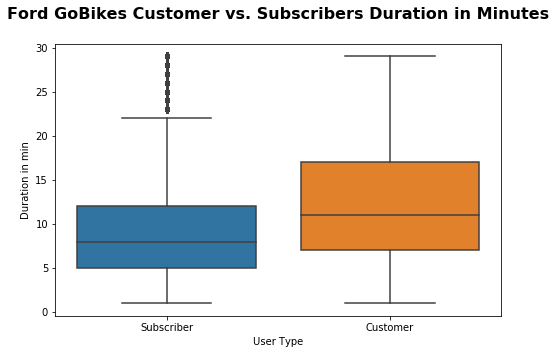

In [8]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df.query('duration_min < 30'), x = 'user_type', y = 'duration_min')
plt.title('Ford GoBikes Customer vs. Subscribers Duration in Minutes', y=1.07, fontsize=16, fontweight='bold')
plt.xlabel('User Type')
plt.ylabel('Duration in min')
plt.show()

## Ford GoBikes User_type Weekly Trends in 2019

> As per the heat map above, Customers who use the Ford Gobikes sharing system mainly on the weekends. While, Subscriber normally ride bikes during the weekday from Monday through to Friday, around 8-9 and 16-18. In the weekends, there is a significant drop in the number of rented bikes.

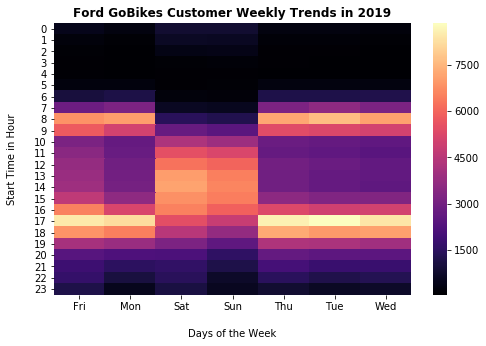

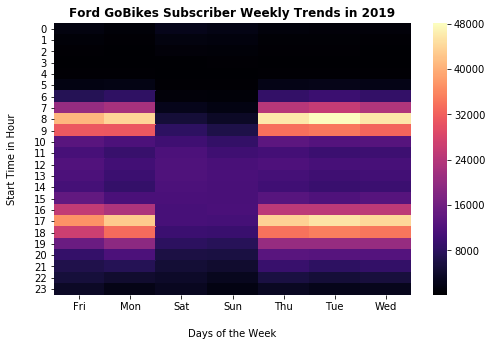

In [5]:
plt.figure(figsize = [8, 5])
#plt.subplots(1,2)

df['start_time_weekday'] = pd.Categorical(df['start_day_of_week'], 
                                                  categories= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], ordered=True);
df_customer = df.query('user_type == "Customer"').groupby(['start_hour_of_day', 'start_day_of_week'])['bike_id'].size().reset_index();
df_customer = df_customer.pivot('start_hour_of_day', 'start_day_of_week', 'bike_id')
heat_map = sb.heatmap(df_customer, cmap = 'magma')
plt.title('Ford GoBikes Customer Weekly Trends in 2019', y=1.07, fontweight='bold')
plt.xlabel('Days of the Week', labelpad = 17)
plt.ylabel('Start Time in Hour',  labelpad = 17)
plt.show()

plt.figure(figsize = [8, 5])
df_subscriber = df.query('user_type == "Subscriber"').groupby(['start_hour_of_day', 'start_day_of_week'])['bike_id'].size().reset_index();
df_subscriber = df_subscriber.pivot('start_hour_of_day', 'start_day_of_week', 'bike_id')
heat_map = sb.heatmap(df_subscriber, cmap = 'magma')
plt.title('Ford GoBikes Subscriber Weekly Trends in 2019', y=1.07, fontweight='bold')
plt.xlabel('Days of the Week', labelpad = 17)
plt.ylabel('Start Time in Hour',  labelpad = 17)
plt.show()


## Summary of Findings
There are two types of Ford GoBike clients using the Ford GoBike System which are Customers and Subscribers. Through analysis:

* July is the most popular month for using the Ford GoBike System with over 250,000 number of bike trips. Followed by March and October.
* 80.4% of the user types in the Ford GoBikes sharing platform were Subscribers. 19.6% of the user types in the Ford GoBikes Sharing Platform were Customers.
* 80.4% of the user types in the Ford GoBikes sharing platform were Subscribers. 19.6% of the user types in the Ford GoBikes Sharing Platform were Customers.
* As per the heat map above, Customers who use the Ford Gobikes sharing system mainly on the weekends. While, Subscriber normally ride bikes during the weekday from Monday through to Friday, around 8-9 and 16-18. In the weekends, there is a significant drop in the number of rented bikes.



> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!